In [2]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/data-science-mock-online-coding-assessment/identify-key-aspects-34fe15c5-072da918/898ffc18cfa311e9.zip

--2020-02-12 18:21:23--  https://he-s3.s3.amazonaws.com/media/hackathon/data-science-mock-online-coding-assessment/identify-key-aspects-34fe15c5-072da918/898ffc18cfa311e9.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.140
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 696035 (680K) [application/zip]
Saving to: ‘898ffc18cfa311e9.zip’

898ffc18cfa311e9.zi 100%[===================>] 679.72K   616KB/s    in 1.1s    

2020-02-12 18:21:25 (616 KB/s) - ‘898ffc18cfa311e9.zip’ saved [696035/696035]



In [3]:
!unzip 898ffc18cfa311e9.zip

Archive:  898ffc18cfa311e9.zip
   creating: Dataset/
  inflating: Dataset/test.csv        
  inflating: Dataset/train.csv       
  inflating: Dataset/Sample_Submission.csv  


In [5]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
os.environ['PYTHONHASHSEED'] = '10000'
np.random.seed(10001)
import random
import tensorflow as tf
random.seed(10002)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=6, inter_op_parallelism_threads=5)
from keras import backend

tf.set_random_seed(10003)
backend.set_session(tf.Session(graph=tf.get_default_graph(), config=session_conf))
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [0]:
train=pd.read_csv('Dataset/train.csv')
test=pd.read_csv('Dataset/test.csv')
s=pd.read_csv('Dataset/Sample_Submission.csv')

In [35]:
train.head(5)

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,15
1,"Did nothing for me, didn't help lost even with...",Useless,11
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,4
3,Gave me an allergic reaction on my face :(,Do not recommend,0
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,17


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['topic'] = le.fit_transform(train['topic'])
le.classes_

array(['Allergic', 'Bad Taste/Flavor', 'Color and texture',
       'Customer Issues', 'Customer Service', "Didn't Like", 'Expiry',
       'False Advertisement', 'Hard to Chew', 'Inferior to competitors',
       'Ingredients', 'Not Effective', 'Packaging', 'Pricing',
       'Quality/Contaminated', 'Shipment and delivery', 'Smells Bad',
       'Texture', 'Too Sweet', 'Too big to swallow',
       'Wrong Product received'], dtype=object)

In [36]:
train['topic'].value_counts()

1     1194
14     715
11     611
0      567
12     467
17     410
15     390
4      239
2      234
19     228
10     216
6      136
16     123
13     107
20      99
18      97
9       44
7       37
5       31
3        8
8        6
Name: topic, dtype: int64

Text(0, 0.5, 'Number of reviews ')

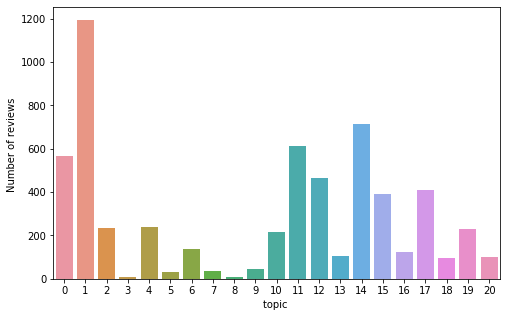

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = np.array(train['topic'].value_counts().index)
y = np.array(train['topic'].value_counts().values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('topic ')
plt.ylabel('Number of reviews ')

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

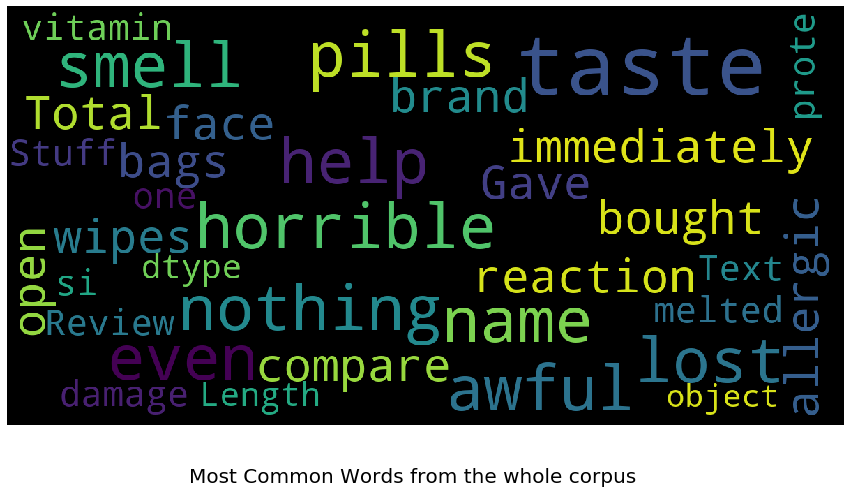

In [39]:
show_wordcloud(train['Review Text'],'Most Common Words from the whole corpus')

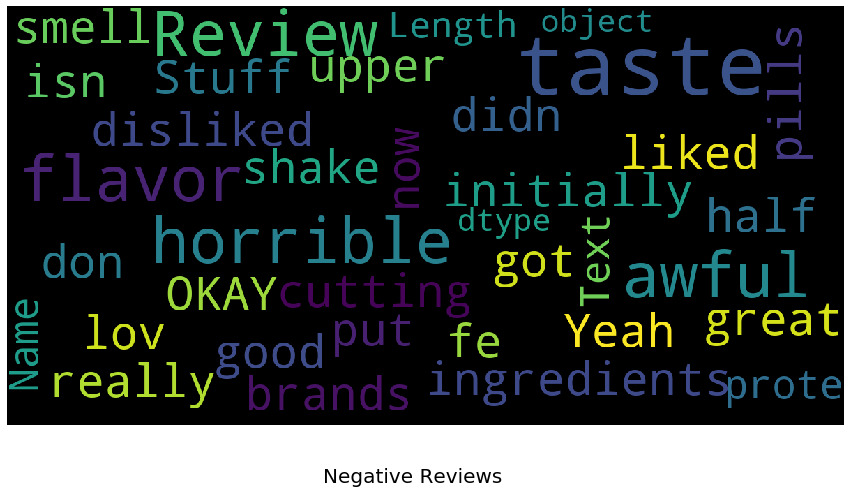

In [40]:
show_wordcloud(train[train['topic'] == 1]['Review Text'],'Negative Reviews')

In [41]:
df=train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import string
punctuation=string.punctuation
df['word_count']=df['Review Text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['Review Text'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Review Text'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['Review Text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [0]:
df['Review Title']=pd.factorize(df['Review Title'])[0]

In [0]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = Tokenizer()

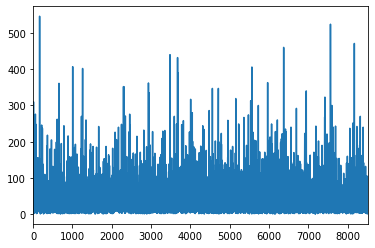

In [46]:

df.word_count.plot()

In [47]:

df_train = df[df['topic'].isnull()==False]
df_test = df[df['topic'].isnull()==True]
print(df_train.shape,df_test.shape)

(5959, 11) (2553, 11)


In [0]:
y = train['topic']

In [0]:
df.columns
col=[x for x in df.columns if x not in ['topic','Review Text']]

In [0]:
from sklearn.model_selection import train_test_split
# x_train , x_val, y_train , y_val = train_test_split(final_features,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from lightgbm import LGBMClassifier

In [52]:
from keras.utils import to_categorical
target=train.topic.values
y=to_categorical(target)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
import re
import nltk

def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = stop                 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


In [54]:
df_train['Review Text']=df_train['Review Text'].apply(url_to_words)
df_test['Review Text']=df_test['Review Text'].apply(url_to_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:

df_train['Review Text'].values

array(['nothing help lost even working eating healthy curb appetite anything',
       'nothing help lost even working eating healthy curb appetite anything',
       'bought bags immediately open one put trash bag split side opened another bag cover split bag also split side x3 buy end throwing box away',
       ..., 'pills smell awful taste', 'stuff taste horrible',
       'taste horrible protein bars good'], dtype=object)

In [0]:
from scipy.sparse import csr_matrix
from scipy import sparse
# final_features = sparse.hstack((df_train[col],train_vectorized )).tocsr()
# final_featurest = sparse.hstack((df_test[col],test_vectorized )).tocsr()

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(df_train['Review Text'],y,test_size = 0.20)
# X_train , X_val , Y_train , Y_val = train_test_split(final_features,y,test_size = 0.20)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping,ReduceLROnPlateau

In [0]:
tokenizer = Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(list(X_train))

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
# X_train
# nb_words = 
max_features = len(word_index) + 1
max_words = 350
batch_size = 1024
epochs = 10
num_classes=21

In [0]:
X_test = tokenizer.texts_to_sequences(df_test['Review Text'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [0]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

In [0]:

from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [65]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py


--2020-02-12 19:04:13--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   199MB/s    in 2.0s    

2020-02-12 19:04:15 (199 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

--2020-02-12 19:04:21--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [tex

In [66]:
import modeling
import optimization
import run_classifier
import tokenization

In [0]:
import zipfile
folder = 'model_folder'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(folder)

In [68]:
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = f'{folder}/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{folder}/outputs'
print(f'>> Model output directory: {OUTPUT_DIR}')
print(f'>>  BERT pretrained directory: {BERT_PRETRAINED_DIR}')

>> Model output directory: model_folder/outputs
>>  BERT pretrained directory: model_folder/uncased_L-12_H-768_A-12


In [69]:
df_train["topic"].values.astype(int)

array([15, 11,  4, ...,  1,  1,  1])

In [0]:
def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))

In [0]:
# Model Hyper Parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 1e-5
NUM_TRAIN_EPOCHS = 3
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 100
# Model configs
SAVE_CHECKPOINTS_STEPS = 100000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 100000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

In [0]:
label_list = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(df_train['Review Text'].values, 'train', labels=df_train['topic'].values.astype(int))

tpu_cluster_resolver = None #Since training will happen on GPU, we won't need a cluster resolver
#TPUEstimator also supports training on CPU and GPU. You don't need to define a separate tf.estimator.Estimator.
run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=ITERATIONS_PER_LOOP,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))


In [83]:
df_train['topic'].values.astype(int)

array([15, 11,  4, ...,  1,  1,  1])

In [0]:
num_train_steps =21
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

model_fn = run_classifier.model_fn_builder(
    bert_config=modeling.BertConfig.from_json_file(CONFIG_FILE),
    num_labels=len(label_list),
    init_checkpoint=INIT_CHECKPOINT,
    learning_rate=LEARNING_RATE,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available  
    use_one_hot_embeddings=True)

In [85]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available 
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE)

INFO:tensorflow:Using config: {'_model_dir': 'model_folder/outputs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 100000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f41f15358d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_tpu_config': TPUConfig(iterations_per_loop=100000, num_shards=8, num_cores_per_repli

In [103]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
num_classes=21
filter_sizes = [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
num_filters = 21
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Reshape((max_words, 300, 1))(x)
maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], 300),
                                 kernel_initializer='he_normal', activation='relu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(max_words - filter_sizes[i] + 1, 1))(conv))
z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(0.1)(z)
outp = Dense(num_classes, activation="softmax")(z)
model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 350)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 350, 300)     2351400     input_5[0][0]                    
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 350, 300, 1)  0           embedding_5[0][0]                
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 350, 1, 21)   6321        reshape_5[0][0]                  
____________________________________________________________________________________________

In [0]:
early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=20, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

Train on 4767 samples, validate on 1192 samples
Epoch 1/5


In [95]:
print(f1_score(np.argmax(model.predict(X_val),axis=1),np.argmax(Y_val,axis=1),average='macro'))
y_pred=model.predict(X_test, verbose=1)
g=np.argmax(y_pred,axis=1)


0.3258290231103248
2553/2553 [==============================] - 7s 3ms/step


In [96]:
g

array([ 1,  1, 11, ...,  1, 14,  4])

In [97]:
y_pred_class = le.inverse_transform(g)
df_sub = pd.DataFrame(data=y_pred_class, columns=['topic'])
df_sub.head()

,topic
0,Bad Taste/Flavor
1,Bad Taste/Flavor
2,Not Effective
3,Ingredients
4,Ingredients


In [99]:
df_sub['topic'].value_counts()

Bad Taste/Flavor          795
Quality/Contaminated      344
Not Effective             320
Allergic                  231
Packaging                 231
Texture                   199
Shipment and delivery     160
Too big to swallow         68
Expiry                     67
Ingredients                52
Color and texture          47
Customer Service           17
Wrong Product received     12
Too Sweet                   4
Pricing                     3
Smells Bad                  3
Name: topic, dtype: int64

In [100]:
!pip install xlsxwriter

     |████████████████████████████████| 143kB 2.8MB/s 


In [0]:
writer = pd.ExcelWriter('aakash.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [0]:
from google.colab import files
files.download('aakash.xlsx')